# Лабораторная работа №3: Регрессионный анализ

---


Выполнил студент гр. 1384 Шаганов Вячеслав. Вариант №21

## Цель работы

Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения

##### Линейная регрессионная модель

Линейная регрессия некоторой зависимой переменной y на набор независимых переменных  x = (x_1, …, x_n), где n – это число наблюдений, предполагает, что линейное отношение между y и x: $y =\beta_0 + \beta_1 x_1 + ⋯ + \beta_nx_n + \epsilon$ - уравнение регрессии. $\beta_0, \beta_1, …, \beta_n$ – коэффициенты регрессии (параметры), и $\epsilon$ – случайная ошибка.

##### МНК (Метод Наименьших Квадратов)

$RSS(\beta)=\left\| Y-X^{\intercal}\beta \right\|^2 \to min\beta$
    
Решение системы нормальных уравнений в регулярном случае: $\hat\beta = (XX^{\intercal})^{-1} XY$ - есть МНК-оценка

##### Несмещённая оценка дисперсии

$s^{2} = \frac{RSS(\hat\beta)}{n-r}$, где $SS_{e}=RSS(\hat\beta)$, r-ранг матрицы X

##### Доверительный интервал

ДНО функции: $\psi=C^{\intercal}\beta$

МНК-оценка: $\hat\psi=C^{\intercal}\beta$

$\frac{\hat\psi-\psi}{S\sqrt{b}}\sim \mathcal{S}_{n-r}$, где $b = C^\intercal (XX^\intercal)^{-1} C$

Тогда Доверительный Интервал уровня доверия $1-\alpha$ будет выглядеть следующим образом: $\left[ \hat\psi - x_{\alpha} s \sqrt{b};\hat\psi + x_{\alpha} s \sqrt{b} \right]$, где $x_{\alpha} = \mathcal{S}_{n-r}^{-1} \left( 1-\frac{\alpha}{2} \right)$

##### Доверительный эллипсоид

Множество $\left\{ \psi:(\psi-\hat\psi)^{\intercal}B^{-1}(\psi-\hat\psi)\le q s^{2}x_{\alpha} \right\}$ представляет доверительный эллипсоид уровня доверия $1 - \alpha$, где $x_{\alpha}$ - квантиль уровня $1-\alpha$ функции распределения хи-квадрат с $(n-r)$ степенями свободы, $B = C^\intercal(XX^\intercal)^{-1} C$, $q$ - размерность $\psi$

##### 

## Постановка задачи

Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y от переменной X. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
При выполнении работы будет использоваться язык Python.

Импортируем используемые далее библиотеки.

In [378]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [379]:
alpha = 0.05
h = 3.00
X_vals = np.array([1.0, 4.0, 3.0, 4.0, 1.0, 3.0, 0.0, 0.0, 4.0, 1.0, 1.0, 3.0, 0.0, 0.0, 3.0, 0.0, 1.0, 4.0, 1.0, 1.0, 2.0, 3.0, 3.0, 3.0, 4.0, 2.0, 1.0, 0.0, 0.0, 4.0, 2.0, 2.0, 4.0, 2.0, 1.0, 0.0, 0.0, 4.0, 4.0, 2.0, 0.0, 1.0, 2.0, 2.0, 0.0, 2.0, 4.0, 3.0, 0.0, 0.0])
Y_vals = np.array([10.77, 26.04, 17.98, 17.24, 6.51, 17.61, 14.93, 19.95, 4.3, 28.41, 4.67, 11.24, 7.46, 21.96, 1.33, 8.58, 14.07, 10.15, 5.45, 20.41, 0.68, 1.04, 5.41, 20.94, 14.29, 13.41, 9.39, 7.18, 5.63, 16.65, 15.67, 9.68, 6.9, 10.62, 17.09, 17.72, 26.4, 14.65, 26.04, 15.75, 13.95, 18.77, 12.62, 15.23, 8.55, 15.73, 3.02, 3.5, 18.09, 3.15])
n = len(X_vals)

### Задание 1
Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной Y по переменной X. Построить МНК оценки параметра сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

Построим результаты эксперимента:

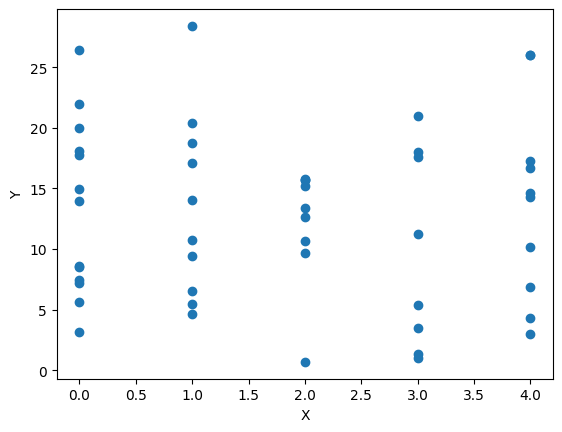

In [380]:
plt.scatter(X_vals, Y_vals)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Сформулируем линейную регрессионную модель переменной Y от переменной X.

$Y = X^\intercal \beta + \epsilon$

$ E_\theta \varepsilon = 0 , \quad Var_\theta \varepsilon = \sigma^2 E $

$X_{(2 \times n)} = \left(\begin{matrix}
1 & 1 & ... & 1 \\
x_1 & x_2 & ...  & x_n
\end{matrix}\right)$

$Y = \left(\begin{matrix}
y_1 \\
y_2 \\
... \\
y_n
\end{matrix}\right) = 
\left(\begin{matrix}
\beta_0 + \beta_1x_1 + \epsilon_1 \\
\beta_0 + \beta_1x_2 + \epsilon_2 \\
... \\
\beta_0 + \beta_1x_n + \epsilon_n
\end{matrix}\right)$

$\beta = \left(\begin{matrix}
\beta_0 \\
\beta_1
\end{matrix}\right)$

МНК оценка вектора $\hat{\beta}$ вычисляется с помощью системы нормальных уравнений: $XX^{\intercal} \beta = XY$

Тогда решение системы нормальных уравнений: $\hat{\beta} = (XX^{\intercal})^{-1}  XY$

In [381]:
X = np.array([
    [1] * len(X_vals), 
    [x_i for x_i in X_vals]]
    )
Y = np.array([y_i for y_i in Y_vals])

XX_T_inv = np.linalg.inv(X @ np.transpose(X))

beta_hat = XX_T_inv @ X @ Y
print(f'beta_0: {round(beta_hat[0], 3)}')
print(f'beta_1: {round(beta_hat[1], 3)}')

beta_0: 13.128
beta_1: -0.213


Построим линию регрессии

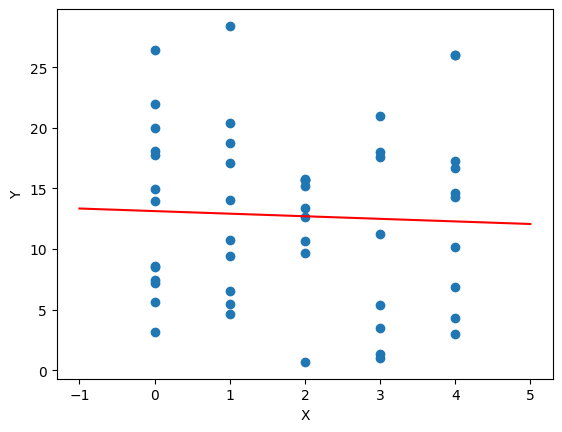

In [382]:
y_reg = lambda x: beta_hat[0] + x * beta_hat[1]
plt.plot(np.linspace(-1, 5, 10), y_reg(np.linspace(-1, 5, 10)), c='r')
plt.scatter(X_vals, Y_vals)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


### Задание 2
Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом h.
Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$. Оценить расстояние полученной оценки до
класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

Несмещённая оценка дисперсии $s^2 = \frac{RSS(\hat{\beta})}{(n - r)}$, $r = rank(X) = 2, RSS(\hat\beta) = \sum^n_{i=1}(y_i-\hat{y_i})^2$ 

In [383]:
def RSS(beta_hat):
    return ( (Y_vals - y_reg(X_vals))**2 ).sum()
s2 = RSS(beta_hat) / (n-2)
err = Y_vals - y_reg(X_vals)
print("Несмещённая оценка дисперсии:", s2)

Несмещённая оценка дисперсии: 51.446418388214376


In [384]:
def draw_hist(X, intervals, *, rwidth=0.8, align='left'):
    counts = [0] * len(intervals)
    for x in X:
        for i in range(len(intervals)):
            if intervals[i][0] < x <= intervals[i][1]:
                counts[i] += 1
    borders = [intr[0] for intr in intervals]
    plt.bar(borders, counts)
    plt.xticks(borders, borders)
    plt.show()
    return counts

In [385]:
intervals = [[-13 + h*i, -13 + h*(i+1)] for i in range(10)]

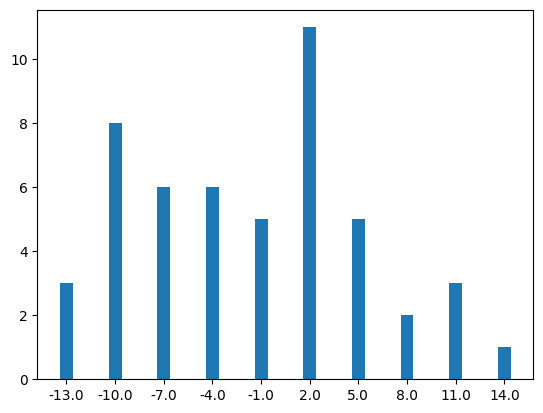

In [386]:
counts = draw_hist(err, intervals)

In [387]:
intervals[0][0] = -10000
intervals[-1][1] = 10000
from scipy import stats
p = [0] * len(intervals)
err_distr = stats.norm(loc=err.mean(), scale=err.std())

for i in range(len(p)):
    p[i] = err_distr.cdf(intervals[i][1]) - err_distr.cdf(intervals[i][0])
p = np.array(p)
x_sq = ((np.array(counts) - n * p)**2 / (n*p)).sum()
x_a = stats.chi(df=len(intervals)-2-1).ppf(1 - alpha)

print("Значение критерия:", int(x_sq >= x_a))

Значение критерия: 1


Критерий равен 1, следовательно, гипотезу нормальности стоит отвергнуть. Из гистограммы также видно, что ошибки имеют очень слабовыраженный вид нормального распределения.

Теперь оценим расстояние полученной оценки до класса нормальных распределений по Колмогорову.

In [388]:
def build_Fn(Y):
    n = len(Y)
    Y = np.sort(Y)
    def Fn(x):
        summ = 0
        for y in Y:
            if y < x:
                summ += 1
        return summ / n
    return Fn

Xs = np.linspace(min(err)-1, max(err)+2, 1000)

Fn = build_Fn(err)
F = stats.norm(loc=0, scale=np.sqrt(s2)).cdf

Dn = np.sqrt(n) * np.max( [np.abs(Fn(x) - F(x)) for x in Xs] )
print(f'{Dn=}')

x_alpha = stats.ksone.ppf(1 - alpha, n)
print(f'{x_alpha=}')


Dn=0.5385348325818821
x_alpha=0.16959440647022855


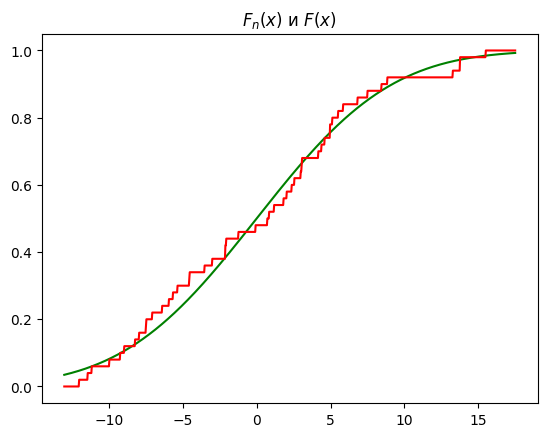

In [389]:
plt.title('$F_n(x)$ и $F(x)$')
plt.plot(Xs, F(Xs), color='green')
plt.plot(Xs, [Fn(x) for x in Xs], c='r')

plt.show()

### Задание 3
В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия
$1-\alpha$. Построить доверительный эллипс уровня доверия $1 - \alpha$ для ($\beta_0$, $\beta_1$) (вычислить его полуоси).

#### Доверительные интервалы
Имеем ДНО функцию $\psi=C^\intercal \beta$ и её МНК-оценку $\hat\psi=C^\intercal \hat\beta$. 
Справедливо $ \frac{\hat \psi - \psi}{s\sqrt{b}} \sim S_{n-r} $, где $b = C^T (XX^T)^{-1}C$

Тогда можно построить доверительный интервал уровня доверия $1 - \alpha$:

$ \mathbb{P}_\theta \left(-x_\alpha \le \cfrac{\hat \psi - \psi}{s\sqrt{b}} \le x_\alpha \right) = 1 -\alpha $, где $ x_\alpha = S_{n-r}^{-1}\left(1 -\frac{\alpha}{2}\right) $

$ \left[ \hat \psi - x_{\alpha}s\sqrt{b}; \hat \psi + x_{\alpha}s\sqrt{b} \right] $ - доверительный интервал для $\psi$

In [390]:
def build_trust_interval(C, psi_hat, XX_T_inv):
    C = np.array(C)
    b = C.T @ XX_T_inv @ C
    s = Y_vals.std()
    return [psi_hat - x_a * s * np.sqrt(b), psi_hat + x_a * s * np.sqrt(b)]

def print_interval(interval, label):
    print(f'[{round(interval[0], 4)}; {round(interval[1], 4)}] - {label}')

print_interval(build_trust_interval([1, 0], beta_hat[0], XX_T_inv), "Доверительный интервал для beta_0")
print_interval(build_trust_interval([0, 1], beta_hat[1], XX_T_inv), "Доверительный интервал для beta_1")

[7.1612; 19.0945] - Доверительный интервал для beta_0
[-2.7433; 2.3176] - Доверительный интервал для beta_1


#### Доверительный эллипс
Доверительный эллипс уровня доверия $1-\alpha$ задаётся неравенством

$ \frac {(\psi - \hat\psi)^\intercal B^{-1}(\psi - \hat\psi)} {q s^2 x_\alpha} \le 1$, где $B = C^T (XX^T)^{-1}C$

In [391]:
import sympy

q = 2
r = 2

C = np.array([
    [1, 0],
    [0, 1]
])
beta_0_sym = sympy.var('beta_0')
beta_1_sym = sympy.var('beta_1')
beta = sympy.Matrix([
    [beta_0_sym],
    [beta_1_sym]
])
B = sympy.Matrix( C.T @ XX_T_inv @ C )
psi = C.dot(beta)
psi_hat = [
    [beta_hat[0]],
    [beta_hat[1]]
]

x_a = stats.f(q, n - r).ppf(1 - alpha)

ellipse = sympy.simplify( ( (psi - psi_hat).T.dot(B.inv()).dot((psi - psi_hat)) / (q * s2 * x_a) )[0][0] )
ellipse

0.152298340203628*beta_0**2 + 0.56045789194935*beta_0*beta_1 - 3.87940424100289*beta_0 + 0.846778771532171*beta_1**2 - 6.99713402297939*beta_1 + 24.7194364333147

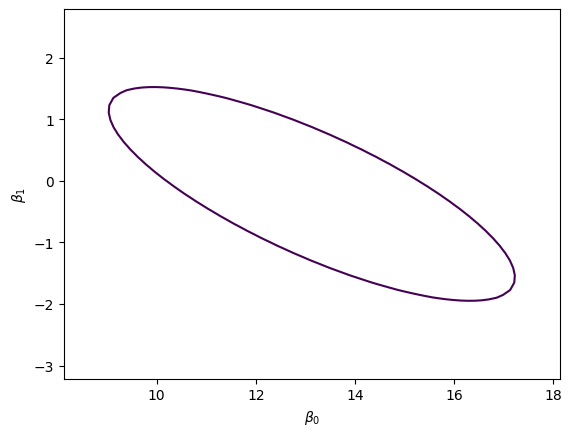

In [392]:
eval_ellipse = lambda beta_0, beta_1: ellipse.subs([(beta_0_sym, beta_0), (beta_1_sym, beta_1)])
b0 = np.linspace(beta_hat[0] - 5, beta_hat[0] + 5, 71)
b1 = np.linspace(beta_hat[1] - 3, beta_hat[1] + 3, 51)
plt.xlabel("$\\beta_0$")
plt.ylabel("$\\beta_1$")
plt.contour(b0, b1, [[eval_ellipse(x, y) for x in b0] for y in b1], levels=[1])
plt.show()

Чтобы найти полуоси эллипса, применим такой поворот к координатам, что коэффициент перед произведением двух компонент будет равен нулю.

Для угла $\theta$ такого поворота верно $\ctg(2\theta) = \frac{A-C}{B}$, где A, C - коэффициенты перед квадратами, B - перед произведением коэффициентов.

In [393]:
A = 0.152298340203628
B = 0.56045789194935
C = 0.846778771532171
theta = np.arctan(B / (A - C)) / 2
theta

-0.3395026543492719

In [394]:
rot_matrix = lambda theta: np.array([ [np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)] ])
x,y = sympy.symbols('x y')
xy = sympy.Matrix([
    [x],
    [y]
])
rotated_ellipse = sympy.simplify( eval_ellipse(*(rot_matrix(theta) @ xy)) )
rotated_ellipse

0.0533278102144052*x**2 + 3.33066907387547e-16*x*y - 1.32779661748813*x + 0.945749301521393*y**2 - 7.88965258697961*y + 24.7194364333147

Можно видеть, что коэффициент при $xy$ равен нулю с точностью до $10^{-16}$

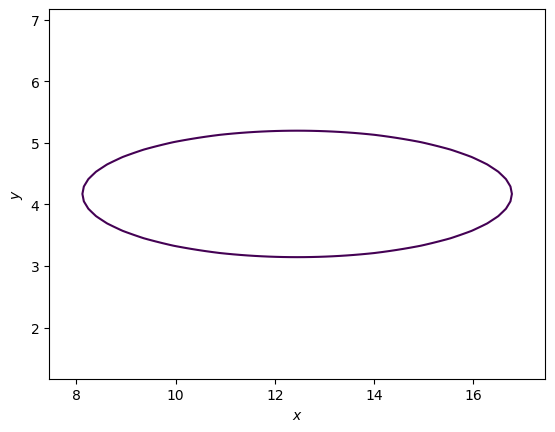

In [395]:
eval_rotated_ellipse = lambda beta_0, beta_1: rotated_ellipse.subs([(sympy.var('x'), beta_0), (sympy.var('y'), beta_1)])
xy_hat = rot_matrix(-theta) @ beta_hat
b0 = np.linspace(xy_hat[0] - 5, xy_hat[0] + 5, 71)
b1 = np.linspace(xy_hat[1] - 3, xy_hat[1] + 3, 51)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.contour(b0, b1, [[eval_rotated_ellipse(x, y) for x in b0] for y in b1], levels=[1])
plt.show()

Теперь найдём полуоси. Двигаясь от центра эллипса вверх до момента равенства единице, можно вычислить полуось для $\beta_1$. Таким же образом для $\beta_0$, двигаясь влево. 

In [396]:
eval_rotated_ellipse(*xy_hat)

def bin_search_boundaries(l, r, dim):
    a = [dim == 0, dim == 1]
    dim = np.array(a, dtype=float)
    while r - l > 1e-9:
        mid = (r+l)/2
        if eval_rotated_ellipse(*(xy_hat + mid * dim)) > 1:
            r = mid
        else:
            l = mid
    return l
print("Полуось по beta_0:", bin_search_boundaries(0, 6, 0))
print("Полуось по beta_1:", bin_search_boundaries(0, 2, 1))

Полуось по beta_0: 4.330351246520877
Полуось по beta_1: 1.0282814120873809


### Задание 4
Сформулировать гипотезу независимости переменной Y от переменной X. Провести проверку значимости

Основная гипотеза: $H_0: \beta_1 = 0$

Альтернативная гипотеза: $H_1: \beta_1 \neq 0$

ДНО функция: $\psi = C^T \beta $

$ C = \begin{pmatrix}
    0 \\
    1
\end{pmatrix} \Rightarrow \psi = 0; \hat\psi = \hat\beta_1 $

$\mathbb{F} = \frac{\hat \psi^T B^{-1} \hat \psi}{qs^2} = \frac{{\hat \beta_1} ^2}{Bqs^2} \sim F_{q, n-r} $

$x_\alpha = F_{q, n-r}^{-1}(1-\alpha)$



In [397]:
q = 1
C = np.array([0.0, 1.0])
B = C.T @ XX_T_inv @ C # scalar
F = beta_hat[1] ** 2 / (B * q * s2)
x_a = stats.f(q, n - r).ppf(1 - alpha)

print("Гипотеза принимается" if F < x_a else "Гипотеза отвергается")

Гипотеза принимается


### Задание 5
Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0, \beta_1, \beta_2$
в данной модели. Изобразить графически полученную регрессионную зависимость

$Y = X^\intercal \beta + \epsilon$

$ E \epsilon = 0 , \quad Var \epsilon = \sigma^2 E $

$ E(Y | X) = X^\intercal \beta,  \beta = (\beta_0, \beta_1, \beta_2) $

$X_{(3 \times n)} = \left(\begin{matrix}
1 & 1 & ... & 1 \\
x_1 & x_2 & ...  & x_n \\
x_1^2 & x_2^2 & ...  & x_n^2 
\end{matrix}\right)$

$Y = \left(
\begin{matrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{matrix}
\right)$


МНК оценка $\beta$ есть решение системы нормальных уравнений: $\hat{\beta} = (XX^{\intercal})^{-1}  XY$

In [398]:
X = np.array([
    [1] * len(X_vals), 
    [x_i for x_i in X_vals],
    [x_i**2 for x_i in X_vals]
])
Y = Y_vals

XX_T_inv = np.linalg.inv(X @ np.transpose(X))
print(XX_T_inv.shape, X.shape, Y.shape)
beta_hat = XX_T_inv @ X @ Y
print(f'beta_0: {round(beta_hat[0], 3)}')
print(f'beta_1: {round(beta_hat[1], 3)}')
print(f'beta_2: {round(beta_hat[2], 3)}')

(3, 3) (3, 50) (50,)
beta_0: 13.858
beta_1: -1.941
beta_2: 0.44


Построим график получившейся регрессионной зависимости.

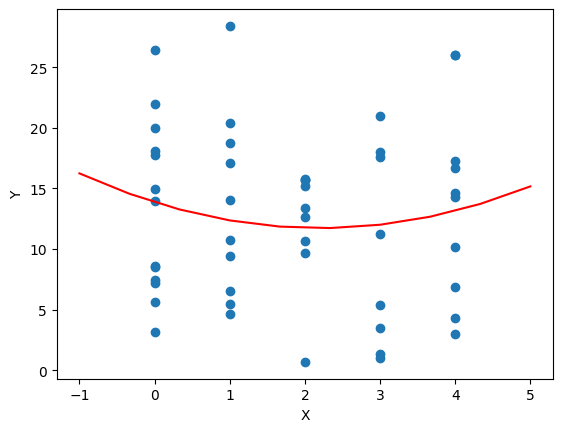

In [399]:
y_reg = lambda x: beta_hat[0] + x * beta_hat[1] + x**2 * beta_hat[2]
plt.plot(np.linspace(-1, 5, 10), y_reg(np.linspace(-1, 5, 10)), c='r')
plt.scatter(X_vals, Y_vals)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Задание 6
Построить несмещјнную оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2

Несмещённая оценка дисперсии $s^2 = \frac{RSS(\hat{\beta})}{(n - r)}$, $r = rank(X) = 3, RSS(\hat\beta) = \sum^n_{i=1}(y_i-\hat{y_i})^2$ 

In [400]:
def RSS(beta_hat):
    return ( (Y_vals - y_reg(X_vals))**2 ).sum()
s2 = RSS(beta_hat) / (n-3)
err = Y_vals - y_reg(X_vals)
print("Несмещённая оценка дисперсии:", s2)

Несмещённая оценка дисперсии: 51.949308675214276


In [401]:
def draw_hist(X, intervals, *, rwidth=0.8, align='left'):
    counts = [0] * len(intervals)
    for x in X:
        for i in range(len(intervals)):
            if intervals[i][0] < x <= intervals[i][1]:
                counts[i] += 1
    borders = [intr[0] for intr in intervals]
    plt.bar(borders, counts)
    plt.xticks(borders, borders)
    plt.show()
    return counts

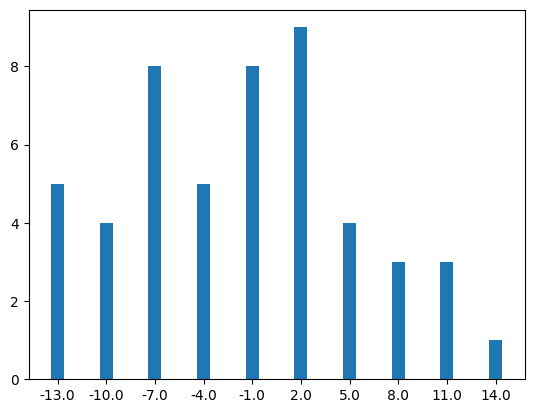

In [402]:
intervals = [[-13 + h*i, -13 + h*(i+1)] for i in range(10)]
counts = draw_hist(err, intervals)

In [403]:
intervals[0][0] = -10000
intervals[-1][1] = 10000
from scipy import stats
p = [0] * len(intervals)
err_distr = stats.norm(loc=err.mean(), scale=err.std())

for i in range(len(p)):
    p[i] = err_distr.cdf(intervals[i][1]) - err_distr.cdf(intervals[i][0])
p = np.array(p)
x_sq = ((np.array(counts) - n * p)**2 / (n*p)).sum()
x_a = stats.chi(df=len(intervals)-2-1).ppf(1 - alpha)

print("Значение критерия:", int(x_sq >= x_a))

Значение критерия: 0


Критерий равен 0, следовательно, оснований отвергнуть гипотезу нормальности нет.

Теперь оценим расстояние полученной оценки до класса нормальных распределений по Колмогорову.

In [404]:
Xs = np.linspace(min(err)-1, max(err)+2, 1000)

Fn = build_Fn(err)
F = stats.norm(loc=0, scale=np.sqrt(s2)).cdf

Dn = np.sqrt(n) * np.max( [np.abs(Fn(x) - F(x)) for x in Xs] )
print(f'{Dn=}')

x_alpha = stats.ksone.ppf(1 - alpha, n)
print(f'{x_alpha=}')

Dn=0.7633585982806016
x_alpha=0.16959440647022855


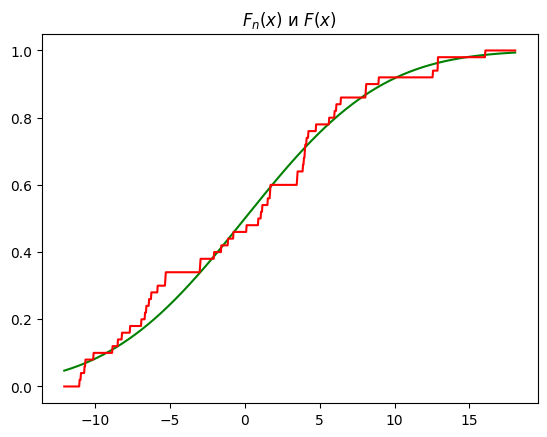

In [405]:
plt.title('$F_n(x)$ и $F(x)$')
plt.plot(Xs, F(Xs), color='green')
plt.plot(Xs, [Fn(x) for x in Xs], c='r')

plt.show()

### Задание 7
В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0, \beta_1, \beta_2$ уровня
доверия $1 - \alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1 - \alpha$.

#### Доверительные интервалы
Аналогично пункту 3, имеем доверительный интервал:

$ \left[ \hat \psi - x_{\alpha}s\sqrt{b}; \hat \psi + x_{\alpha}s\sqrt{b} \right] $ - доверительный интервал для $\psi$

In [406]:
print_interval(build_trust_interval([1, 0, 0], beta_hat[0], XX_T_inv), "Доверительный интервал для beta_0")
print_interval(build_trust_interval([0, 1, 0], beta_hat[1], XX_T_inv), "Доверительный интервал для beta_1")
print_interval(build_trust_interval([0, 0, 1], beta_hat[2], XX_T_inv), "Доверительный интервал для beta_2")

[6.8618; 20.8543] - Доверительный интервал для beta_0
[-10.9478; 7.0666] - Доверительный интервал для beta_1
[-1.7632; 2.6441] - Доверительный интервал для beta_2


#### Доверительный эллипс
Доверительный эллипс уровня доверия $1-\alpha$ задаётся неравенством

$ \frac {(\psi - \hat\psi)^\intercal B^{-1}(\psi - \hat\psi)} {q s^2 x_\alpha} \le 1$, где $B = C^T (XX^T)^{-1}C$

In [407]:
import sympy

q = 3
r = 3

C = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])
beta_0_sym = sympy.var('beta_0')
beta_1_sym = sympy.var('beta_1')
beta_2_sym = sympy.var('beta_2')
beta = sympy.Matrix([
    [beta_0_sym],
    [beta_1_sym],
    [beta_2_sym]
])
B = sympy.Matrix( C.T @ XX_T_inv @ C )
psi = C.dot(beta)
psi_hat = [
    [beta_hat[0]],
    [beta_hat[1]],
    [beta_hat[2]]
]

x_a = stats.f(q, n - r).ppf(1 - alpha)

ellipsoid = sympy.simplify( ( (psi - psi_hat).T.dot(B.inv()).dot((psi - psi_hat)) / (q * s2 * x_a) )[0][0] )
ellipsoid

0.114484264756442*beta_0**2 + 0.421302094303709*beta_0*beta_1 + 1.27306502409164*beta_0*beta_2 - 2.91618898558199*beta_0 + 0.63653251204582*beta_1**2 + 4.29544961366172*beta_1*beta_2 - 5.25981926626408*beta_1 + 7.69792196222319*beta_2**2 - 16.087466264693*beta_2 + 18.6455379198535

### Задание 8
Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной X и проверить её значимость на уровне $\alpha$

$C = \begin{pmatrix}
    0 & 1 & 0 \\
    0 & 0 & 1 
\end{pmatrix}^\intercal$

Основная гипотеза: $H_0 : С^\intercal\beta = 0$

Альтернативная гипотеза: $H_1 : C^\intercal\beta \neq 0$

ДНО функция $\psi = C^T \beta = 0$

$\hat\psi = \begin{pmatrix}
    \hat\beta_1 \\
    \hat\beta_2 
\end{pmatrix}$

$\mathcal{F} = \frac{\hat \psi^T B^{-1} \hat \psi}{qs^2} \sim F_{q, n-r}$

In [408]:
q = 1
C = np.array([
    [0.0, 1.0, 0.0],
    [0.0, 0.0, 1.0]
]).T

B = C.T @ XX_T_inv @ C # scalar
psi_hat = np.array([beta_hat[1], beta_hat[2]]).reshape(-1, 1)

F = psi_hat.T @ np.linalg.inv(B) @ psi_hat / (q * s2)
x_a = stats.f(q, n - r).ppf(1 - alpha)

print("Гипотеза принимается" if F < x_a else "Гипотеза отвергается")

Гипотеза принимается


## Выводы

В ходе данной лабораторной работы с использованием метода наименьших квадратов была получена оценка параметров. 
Была проверена гипотеза независимости Y от переменной X.
Для параметров построены доверительные интервалы с уровнем доверия $1-\alpha$, а также доверительные эллипсоиды. 
Был введён дополнительный параметр регрессии, с учётом которого была проделана вся та же работа.